In [1]:
import lstm

SEQ_LEN=15

Using TensorFlow backend.


In [2]:
# get Microsoft's stock opening prices and create list of 15 day frames
times = lstm.get_time_series_daily("MSFT", filters=["1. open"], outputsize="full")
# times = lstm.get_time_series_daily("MSFT", filters=["4. close", "5. volume"], outputsize="full")
# times are returned descending from most recent so should be reversed
vectors = lstm.times_to_vectors(times)[::-1]
frames = lstm.get_frames(vectors, seq_len=SEQ_LEN, with_target=True) # each frame is 15+1 (trend length + prediction target) vectors

print(f"last frame: {frames[-1]}")
print(f"last target frame: {frames[-1][-1]}")

last frame: [['106.2000'], ['106.1400'], ['107.5000'], ['106.3100'], ['107.9100'], ['107.7900'], ['107.8600'], ['106.9000'], ['110.0500'], ['111.7600'], ['111.2600'], ['111.6900'], ['112.0400'], ['112.8900'], ['113.0200'], ['112.2500']]
last target frame: ['112.2500']


In [3]:
# seperate normalized frames into training and testing data
train, test = lstm.partition_data(frames, partition_coefficient=0.8)
# split training and testing data into sequences and their targets
train_x, train_y = lstm.seperate_xy(lstm.normalize_frames(train))
# train_y = [[target[0]] for target in train_y]

test_x, test_y = lstm.seperate_xy(lstm.normalize_frames(test))
# test_y = [[target[0]] for target in test_y]

print(f"training sequence 1: {train_x[0]}, target: {train_y[0]}")
print(f"testing sequence 1: {test_x[0]}, target: {test_y[0]}")

training sequence 1: [[0.0], [-0.031131221719457036], [-0.03167420814479638], [-0.060633484162895934], [-0.08597285067873306], [-0.07294117647058829], [-0.09601809954751128], [-0.1120361990950226], [-0.11656108597285064], [-0.10859728506787325], [-0.07294117647058829], [-0.07638009049773753], [-0.055475113122171904], [-0.033393665158371055], [-0.03674208144796387]], target: [-0.00959276018099553]
testing sequence 1: [[0.0], [-0.013563501849568338], [0.007398273736128447], [-0.01376900945334969], [-0.02055076037813397], [-0.02404438964241662], [-0.014591039868474986], [-0.01602959309494434], [0.0036991368680643344], [-0.004521167283189409], [-0.0055487053020960575], [0.0032881216605014085], [-0.008220304151253521], [-0.03185367858610766], [-0.022194821208384674]], target: [-0.032470201397451715]


In [4]:
# create LSTM model using the training data
model = lstm.setup_lstm_model(train_x, train_y)
print(model)

compilation time :  0.09285306930541992
Train on 4035 samples, validate on 213 samples
Epoch 1/1
4035/4035 [==============================] - 2s 463us/step - loss: 0.0056 - val_loss: 0.0031


In [5]:
# predict results using the test data
predictions = lstm.predict_sequences_multiple(model, test_x)

final sequence: [[0.0], [-0.0005649717514124575], [0.012241054613935987], [0.001035781544256098], [0.01610169491525415], [0.014971751412429457], [0.01563088512241051], [0.006591337099811634], [0.0362523540489641], [0.05235404896421847], [0.04764595103578162], [0.051694915254237195], [0.05499058380414312], [0.0629943502824859], [0.06421845574387941]]
predicted: [0.00149699]
actual: [0.0569679849340865]


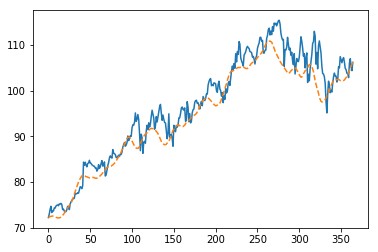

Next predicted normalized value:
current: 112.2500
next predicted: 106.85804743587971


In [25]:
print(f"final sequence: {test_x[-1]}")
print(f"predicted: {predictions[-1]}")
print(f"actual: {test_y[-1]}")
# plot the results of the last month
# (dashed line is prediction)
lstm.plot_results_multiple(predictions[-365:], test[-365:])

# get next prediction:
next_seq = frames[-1][-SEQ_LEN:]
current_val = next_seq[-1]
next_predicted = lstm.predict_sequences_multiple(model, [lstm.normalize_frame(next_seq)])
print("Next predicted normalized value:")
print(f"current: {current_val[0]}")
print(f"next predicted: {lstm.denormalize_dim(next_predicted[0][0], next_seq[0][0])}")